In [1]:
import bt

In [2]:
data = bt.get('spy,agg', start='2010-01-01')
print(data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  spy        agg
Date                            
2010-01-04  85.515663  67.593857
2010-01-05  85.742020  67.901329
2010-01-06  85.802368  67.862144
2010-01-07  86.164558  67.783577
2010-01-08  86.451317  67.822845


In [3]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [4]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

100%|██████████| 1/1 [00:00<00:00,  8.67it/s]


<Axes: title={'center': 'Equity Progression'}>

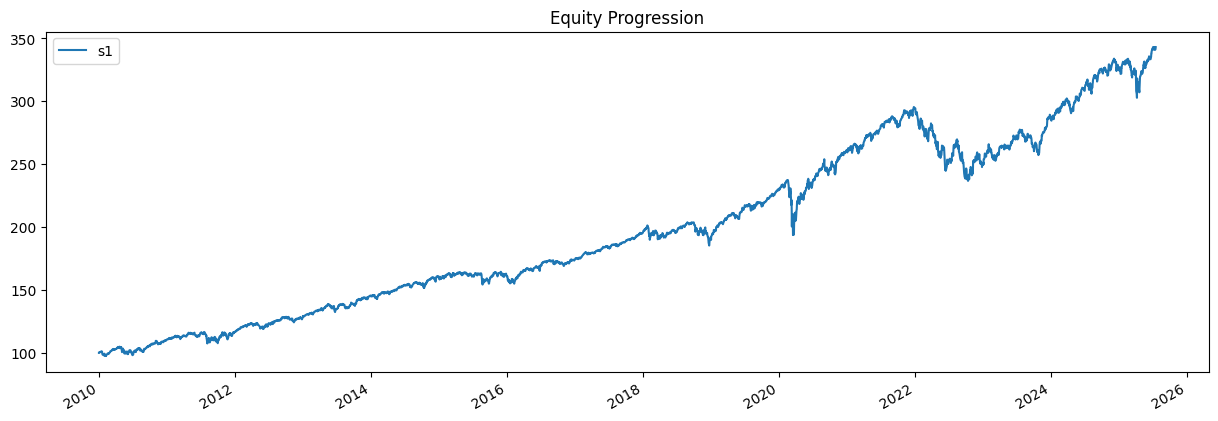

In [6]:
# first let's see an equity curve
res.plot()

In [10]:
res.display()

Stat                 s1
-------------------  ----------
Start                2010-01-03
End                  2025-07-18
Risk-free rate       0.00%

Total Return         242.96%
Daily Sharpe         0.94
Daily Sortino        1.46
CAGR                 8.26%
Max Drawdown         -19.87%
Calmar Ratio         0.42

MTD                  0.40%
3m                   10.06%
6m                   4.54%
YTD                  5.58%
1Y                   9.41%
3Y (ann.)            10.76%
5Y (ann.)            7.28%
10Y (ann.)           7.70%
Since Incep. (ann.)  8.26%

Daily Sharpe         0.94
Daily Sortino        1.46
Daily Mean (ann.)    8.34%
Daily Vol (ann.)     8.90%
Daily Skew           -0.54
Daily Kurt           14.20
Best Day             5.08%
Worst Day            -6.63%

Monthly Sharpe       1.04
Monthly Sortino      1.91
Monthly Mean (ann.)  8.43%
Monthly Vol (ann.)   8.10%
Monthly Skew         -0.34
Monthly Kurt         0.96
Best Month           7.57%
Worst Month          -6.68%

Yearly Shar

  0%|          | 0/2 [00:00<?, ?it/s]/Users/liupeng/PycharmProjects/ZBot/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/Users/liupeng/PycharmProjects/ZBot/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/Users/liupeng/PycharmProjects/ZBot/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version th

<Axes: title={'center': 'Equity Progression'}>

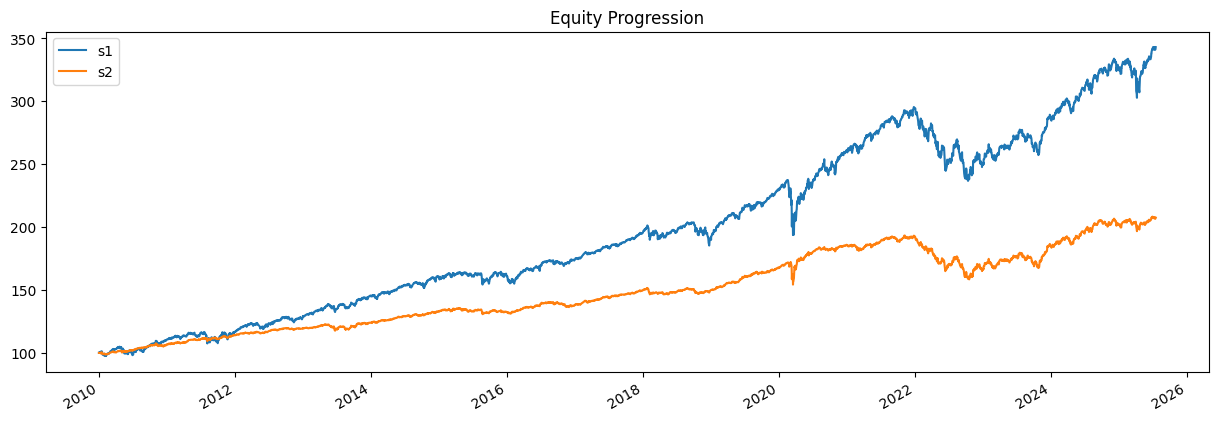

In [9]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot()